In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn import metrics
import numpy as np
import statistics as stat

In [2]:
pd.set_option('precision', 4)

real = pd.read_csv('Real estate.csv')

In [3]:
real.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.8788,10,24.9830,121.5402,37.9
1,2,2012.917,19.5,306.5947,9,24.9803,121.5395,42.2
2,3,2013.583,13.3,561.9845,5,24.9875,121.5439,47.3
3,4,2013.500,13.3,561.9845,5,24.9875,121.5439,54.8
4,5,2012.833,5.0,390.5684,5,24.9794,121.5425,43.1


In [4]:
real.shape

(414, 8)

In [5]:
real.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.0000,414.000,414.0000,414.0000,414.0000,414.0000,414.0000,414.0000
mean,207.5000,2013.149,17.7126,1083.8857,4.0942,24.9690,121.5334,37.9802
std,119.6558,0.282,11.3925,1262.1096,2.9456,0.0124,0.0153,13.6065
min,1.0000,2012.667,0.0000,23.3828,0.0000,24.9321,121.4735,7.6000
25%,104.2500,2012.917,9.0250,289.3248,1.0000,24.9630,121.5281,27.7000
50%,207.5000,2013.167,16.1000,492.2313,4.0000,24.9711,121.5386,38.4500
75%,310.7500,2013.417,28.1500,1454.2790,6.0000,24.9775,121.5433,46.6000
max,414.0000,2013.583,43.8000,6488.0210,10.0000,25.0146,121.5663,117.5000


In [6]:
real.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [7]:
df1 = real.copy()
df2 = real.copy()

In [8]:
df2.pop('No').values
df2.pop('Y house price of unit area').values

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

In [9]:
def regression_line(x,y):
    
    m = (sum(x*y) - (sum(x)*sum(y)/len(x)))/(sum(x*x) - (sum(x)*sum(x)/len(x)))
    constant = stat.mean(y) - m*stat.mean(x)
    print(f'linear regression line: Slope = {m:.2f}, Constant = {constant:.2f}')
    
    plt.plot(x, y, 'o')
    reg_line = [(m * i) + constant for i in x]
    plt.plot(x, reg_line)
    plt.show()

linear regression line: Slope = 4.22, Constant = -8461.35


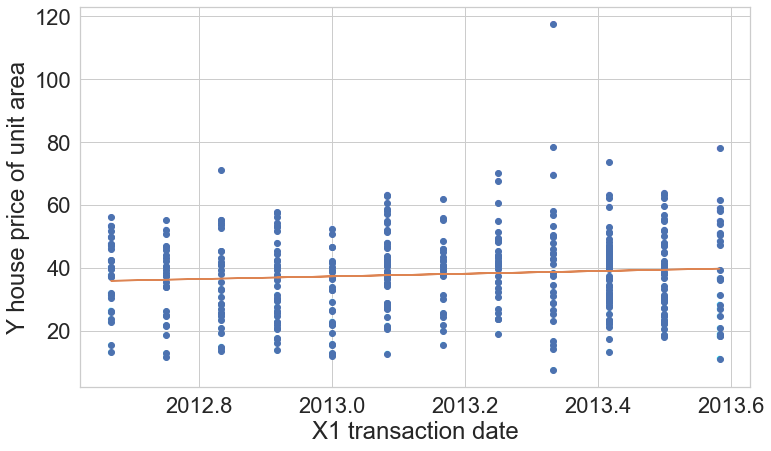

linear regression line: Slope = -0.25, Constant = 42.43


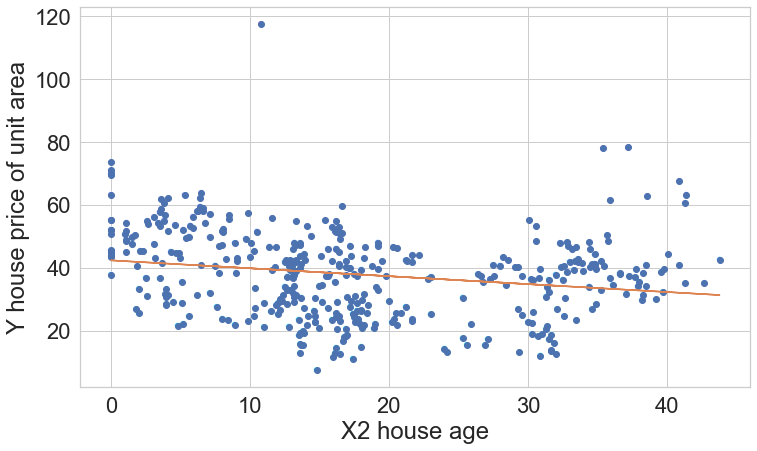

linear regression line: Slope = -0.01, Constant = 45.85


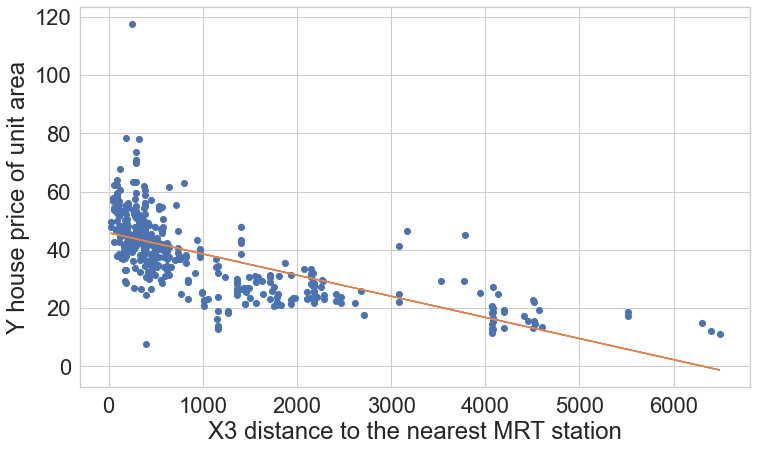

linear regression line: Slope = 2.64, Constant = 27.18


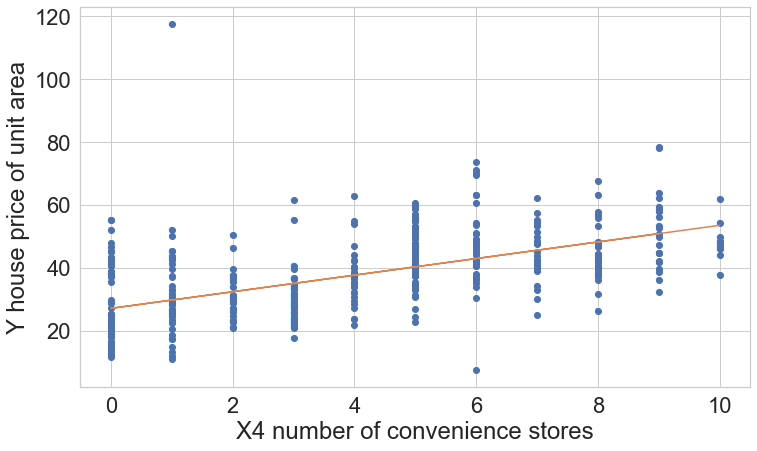

linear regression line: Slope = 598.97, Constant = -14917.68


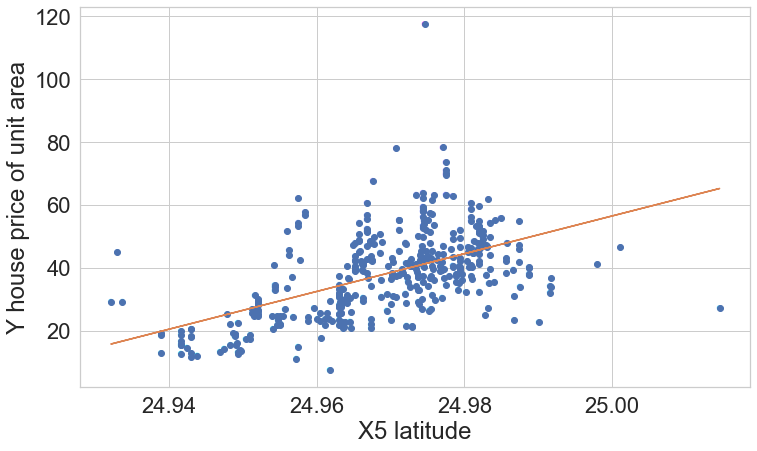

linear regression line: Slope = 463.93, Constant = -56345.58


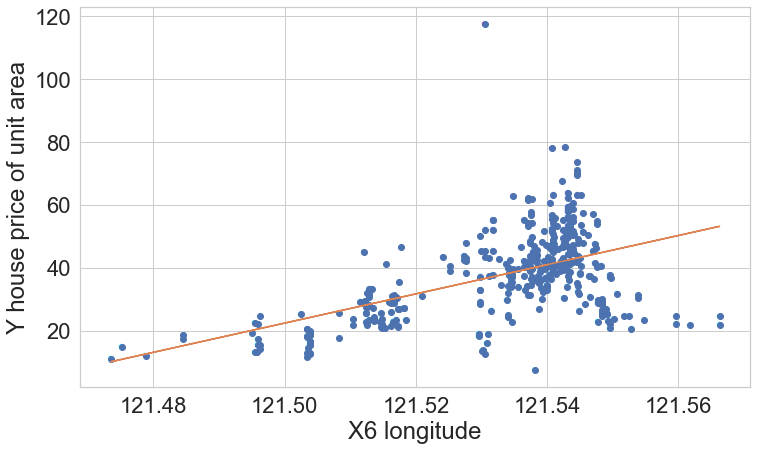

In [11]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

for i in df2.columns:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df1, x=i, y='Y house price of unit area',hue='Y house price of unit area',
                    palette='cool', legend=False)
    regression_line(df2[i], df1['Y house price of unit area'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df2, df1['Y house price of unit area'], random_state=11)

print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (310, 6)
Shape of testing  set = (104, 6)


In [13]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(df2.columns):
    print(f'{name:}: {linear_regression.coef_[i]:20.20f}')

print()
print(f'y-intercept: {linear_regression.intercept_:23.20f}')

X1 transaction date: 5.10465252423606141718
X2 house age: -0.24498687658856385663
X3 distance to the nearest MRT station: -0.00411647281849938929
X4 number of convenience stores: 1.22004976790635510930
X5 latitude: 183.83443047752498955560
X6 longitude: 19.59228063460310664823

y-intercept: -17206.06391957407686277293


In [14]:
import math
from sklearn import metrics

predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.1f}')
print(f'     correlation coefficient = {r:.1f}')

coefficient of determination = 0.5
     correlation coefficient = 0.7


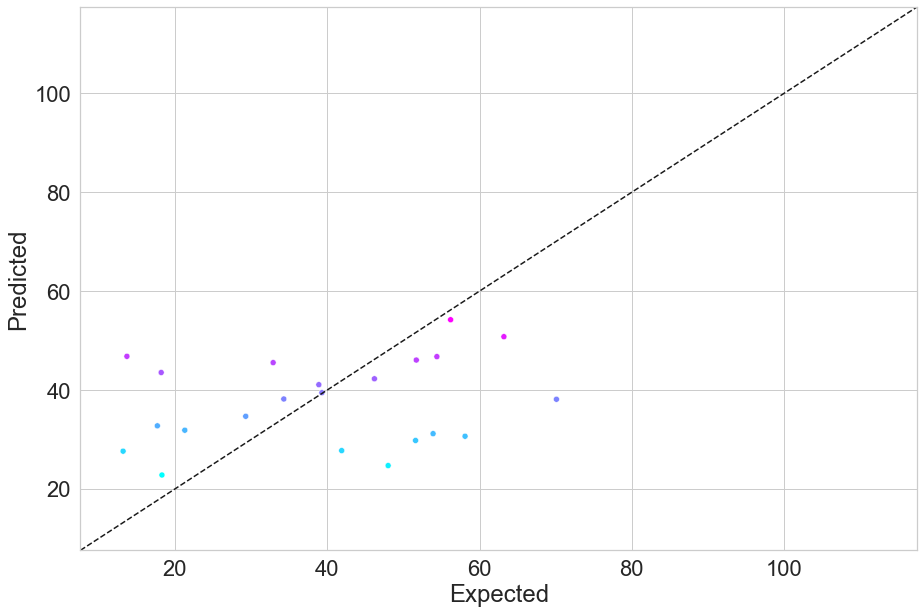

In [15]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')